## Modelisation with SegFormer

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config

config["width"] = 2048
config["height"] = 1023

n = NotebookProcessor(config)

{
    "width": 2048,
    "height": 1023,
    "classes": 8,
    "use_augment": true,
    "image_per_augment": 1,
    "max_evals": 1,
    "mlwflow_tracking_uri": "http://127.0.0.1:5000",
    "mlwflow_experiment_title": "",
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine"
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 326 to 100.


## Model definition

> SAM (Sharpness-Aware Minimization) is an optimization technique that improves deep learning model generalization by focusing on minimizing loss uniformly across a neighborhood of model parameters, rather than just at a single point. This method helps reduce overfitting and enhances model robustness and test accuracy by seeking out flatter areas in the loss landscape.

Here I use the base one, not used for semantic segmentation, I wanted to quickly try it out

## Model usage

In [2]:
checkpoint = "facebook/sam-vit-base"
mask_generator = pipeline(model=checkpoint, task="mask-generation")

In [3]:
def display_images_with_masks(image_path):
    image = Image.open(image_path).resize((config["width"],config["height"]))
    masks = mask_generator(image, points_per_batch=128, pred_iou_thresh=0.88)
  
    colors = mpl.colormaps['viridis'].with_extremes(under="none", over="none", bad="none") 
      
    num_masks = len(masks["masks"])  
  
    height, width = masks["masks"][0].shape  
    combined_masks = np.zeros((height, width, 4))  
  
    for i, mask in enumerate(masks["masks"]):  
        mask_color = colors(i / num_masks)[:3]  
  
        mask_colored = np.dstack((mask * mask_color[0], mask * mask_color[1], mask * mask_color[2], mask))  
        combined_masks += mask_colored  
  
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))  
  
    # Display original image  
    ax[0].imshow(image)  
    ax[0].set_title("Original Image")  
    ax[0].axis('off')  
  
    # Display combined masks  
    ax[1].imshow(combined_masks)  
    ax[1].set_title("Mask")  
    ax[1].axis('off')  
  
    ax[2].imshow(image)
    ax[2].imshow(combined_masks, cmap='viridis', alpha=0.5)
    ax[2].set_title("Original + Mask Overlay")  
    ax[2].axis('off')  
  
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


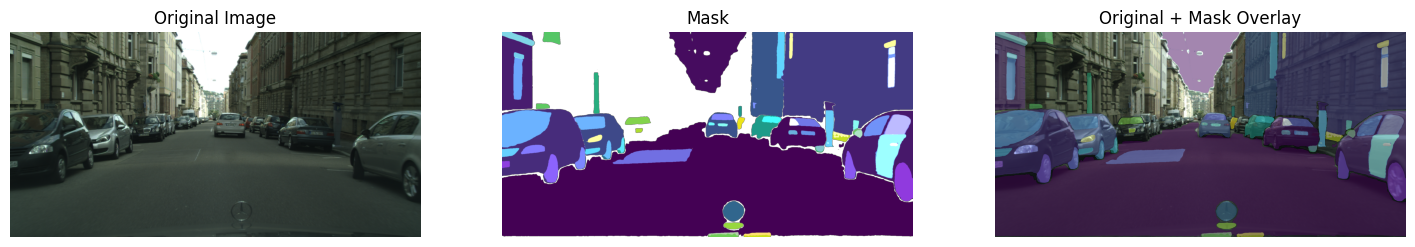

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


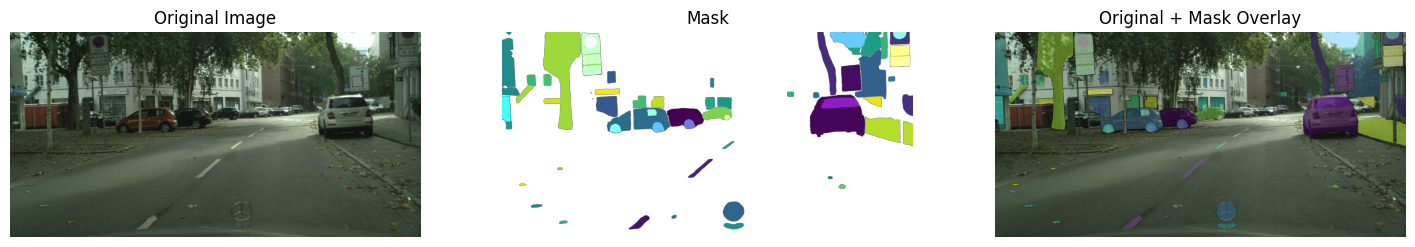

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


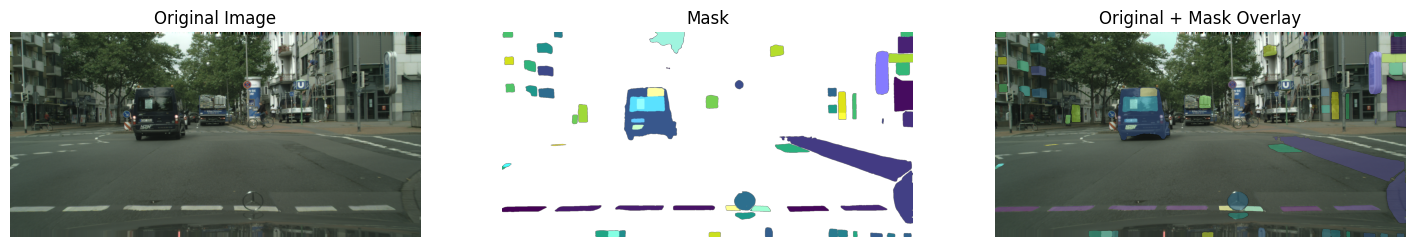

In [4]:
display_images_with_masks(n.img["train"][0])
display_images_with_masks(n.img["train"][1])
display_images_with_masks(n.img["train"][2])